# Analysis of average energy consumption <br/>of 10000 households in The Netherlands
---

## Datasets

The datasets are retrieved from [Liander](https://www.liander.nl/), an energy Distribution System Operator (DSO) in The Netherlands. The following datasets are available on Liander web page [Innovation and Data services](https://www.liander.nl/over-liander/innovatie/open-data/data):

* __Energy consumption per year__<br>includes energy consumption for natural gas supplies with a maximum capacity of 40 m3/h and for electrity supplies with a maximum capacity of 3x80 ampère.
* __Energy consumption per year per housing archtype__<br>includes standard consumption for natural gas and electricity for the following housing archetypes
    * semi-detached - duplex home
    * apartement
    * terraced home
    * detached home
* __Day profiles of energy consumption for one year__<br>includes averaged hourly natural gas and electricity consumption of 10000 households, estimated for energy demand in 2009. The hourly data can be combined with above datasets to calculate hourly specific energy consumption per year and per per housing archetype.
* __Smart meter data of 80 households__<br>includes real energy consumption data of 80 households recorded in 2013.

## Day profiles of energy consumption for one year
This dataset estimates the yearly energy consumption of electricity and natural per hour for 10000 households.The consumption data are normalised based on average temperature profiles of the last 20 years (refernence year 2009). 
N.B.: The datasets are based on existing data (measured or calculated) and are primarily used for consumption estimates for energy allocation and/or reconciliation processes.

### File names
|          |   | <p align="left">Electricity consumption data   | <p align="left">Natural gas consumption data    |
| -------- | - |----------------------------------------------- | ------------------------------------------------|
| Filename || <p align="left">_dagprofielen elektriciteit.csv_  | <p align="left"> _dagprofielen gas.csv_         |
    
### File structures
The data are provided as CSV file. Note that decimal-dots are "comma's".
    
| Row | Column | <p align="left">Electricity consumption data   | <p align="left">Natural gas consumption data    |
| --- | ------ |----------------------------------------------- | ------------------------------------------------| 
| 1   |        | <p align="left"> contains the start date and time of the data set.<br/>This data set refers to the year __2009__ | <p align="left"> contains the start date and time of the data set.<br/>This data set refers to the year __2008__|
| 2   |        | <p align="left">__Headers__                  | <p align="left">__Headers__                   | 
|     | 1      | <p align="left">__Date & time__<br/> Character string in the format dd-mm-yyyy hh:mm:ss. The timezone used is UTC+1. Hence, no daylight saving time is applied, i.e. continuous wintertime is shown. The time is the end time of the hourly period. | <p align="left">__Date and time__<br/>Same as for Electricity consumption data but different header name: "Date and time"|
|     | 2      | <p align="left">__Dag/Day__<br/> Number of each day in a year, i.e. 1 to 365 (or 366). ||
|     | 3      | <p align="left">__Profile E1a \[kWh\]__<br/>Estimated energy consumption of customers with an electricity connection with a maximum capacity of 3x 25 Ampère and a single meter. Note that it is unknown how many records fall into this category.  | <p align="left">__G1a profiled demand \[MJ\]__<br/>The ratio of hourly profiles multiplied by the standard year natural gas consumption of all households in Megajoules (MJ). Note the the calorific value (chemical composition) and pressure of natural gas differs per region and fluctuates over time (within a given Wobbe band). The data refers to small consumers with less than 5000 m3 (n;35,17 MJ/m3) gas consumption per year and a gas meter ≤ G6. Note that it is unknown how many records fall into this category. Additional information over natural gas profiles can be found on [EDSN](https://www.edsn.nl/). |
|     | 4      | <p align="left">__Profile E1b \[kWh\]__<br/>Estimated energy consumption of customers with an electricity connection with a maximum capacity of 3x 25 Ampère and a double meter for day and night tariffs. Note that it is unknown how many records fall into this category.  | <p align="left">__G2a profiled demand \[MJ\]__<br/>Similar to Column3 G1a profiled demand customers, but with a different profile. Note that it is unknown how many records fall into this category. |
|     | 5      | <p align="left">__Totaal / Total__<br/>Sum of Profiles E1a and E1b, i.e. the total hourly electricity consumption of 10,000 households.  | <p align="left">__Totaal / Total__<br/>Sum of Profiles G1a and G2a, i.e. the total hourly natural gas consumption of 10,000 households. |
|     | 6      | <p align="left">__Contains no data.__<br/>  | <p align="left">__uurfracie G / hour fraction G__<br/>Ratio of estimated hourly natural gas consumption over the estimated yearly total natural gas consumption. |
|     | 7      | <p align="left">__uurfracie E / hour fraction E__<br/>Ratio of estimated hourly electricity consumption over the estimated yearly total energy consumption.  ||
| 3 ff |       | <p align="left">__Data__ for example<br/>01-01-2009 09:00:00;1,00;1672,66506;1407,983823;3080,648883;;0,00009861<br/>01-01-2009 10:00:00;1,00;1978,957428;1654,017414;3632,974842;;0,00011629<br/>01-01-2009 11:00:00;1,00;2278,587734;2311,156494;4589,744227;;0,00014691                            ||
| n-1 |        | <p align="left">__EMPTY<br/> ;;;;;; ||
| n   |        | <p align="left">__Summary__ for example<br/> ;;;;31240940,35;;1                            ||

### Data integrity

Note that for Natural Gas consumption (file name (dagprofielen gas.csv) data provide in columns
- G1a profiled demand \[MJ\]
- G2a profiled demand \[MJ\]
- Totaal / Total \[MJ\]

are apparently false, both regarding value and physical unit. The custodian of the data set (Mr Christian Klep) at Liander replied on 7 March 2018 that he cannot provide a reasonable algorithm to calculate the given values. He suggests to not use the data but to apply the hour fraction of (G) natural gas multiplied by a given Standard Year Consumption (SYC / Dutch SJV). 

## Data analysis
### Read CSV files

#### Electricity consumption data

In [39]:
#####################################################################################
#
# Liander_E_read_csv
#
# - 
#
#####################################################################################

# set the working directory
# for Mac OS X
# setwd("~/R/Liander")
# for Linux Mint LMDB2
#setwd("/media/psf/Home/R/Liander")

# load the data
Liander_E <- read.csv(file="dagprofielen elektriciteit.csv",  
                   header = TRUE,
                   sep = ";",
                   dec=",", 
                   skip=1,                     # skip first row - not of interest
                   encoding = "latin1",
                   stringsAsFactors = FALSE
                     )

In [40]:
Liander_E

Date...time,Dag,Profile.E1a..kWh.,Profile.E1b..kWh.,Totaal,X,uurfractie.E
01-01-2009 01:00:00,1,2082.4631,2131.5415,4214.005,NA,0.00013489
01-01-2009 02:00:00,1,1727.2615,1849.9747,3577.236,NA,0.00011450
01-01-2009 03:00:00,1,1354.8359,1427.0248,2781.861,NA,0.00008905
01-01-2009 04:00:00,1,1047.4062,1212.9261,2260.332,NA,0.00007235
01-01-2009 05:00:00,1,953.6498,1069.7439,2023.394,NA,0.00006477
01-01-2009 06:00:00,1,936.5884,1025.3649,1961.953,NA,0.00006280
01-01-2009 07:00:00,1,1016.8582,1083.5373,2100.395,NA,0.00006723
01-01-2009 08:00:00,1,1216.3950,1290.8892,2507.284,NA,0.00008026
01-01-2009 09:00:00,1,1672.6651,1407.9838,3080.649,NA,0.00009861
01-01-2009 10:00:00,1,1978.9574,1654.0174,3632.975,NA,0.00011629


#### Gas consumption data

In [41]:
#####################################################################################
#
# Liander_G_read_csv
#
# - 
#
#####################################################################################

# set the working directory
# for Mac OS X
# setwd("~/R/Liander")
# for Linux Mint LMDB2
#setwd("/media/psf/Home/R/Liander")

# load the data
Liander_G <- read.csv(file="dagprofielen gas.csv",  
                   header = TRUE,
                   sep = ";",
                   dec=",", 
                   skip=1,                     # skip first row - not of interest
                   encoding = "latin1",
                   stringsAsFactors = FALSE
                    )

In [42]:
Liander_G

Date.and.time,Dag,G1a.profiled.demand..MJ.,G2a.profiled.demand..MJ.,Totaal,Uur.fractie.G
01-01-2008 01:00:00,1,0.00008217,0.000178885,0.000261055,0.000101990
01-01-2008 02:00:00,1,0.00007643,0.000194528,0.000270957,0.000105858
01-01-2008 03:00:00,1,0.00008378,0.000207574,0.000291358,0.000113829
01-01-2008 04:00:00,1,0.00009538,0.000228570,0.000323953,0.000126563
01-01-2008 05:00:00,1,0.00011686,0.000259245,0.000376109,0.000146940
01-01-2008 06:00:00,1,0.00017562,0.000308066,0.000483683,0.000188967
01-01-2008 07:00:00,1,0.00031999,0.000379356,0.000699350,0.000273224
01-01-2008 08:00:00,1,0.00040054,0.000440697,0.000841237,0.000328657
01-01-2008 09:00:00,1,0.00039689,0.000439721,0.000836615,0.000326852
01-01-2008 10:00:00,1,0.00036676,0.000415443,0.000782200,0.000305593


### Data cleaning

#### Electricity consumption data

In [43]:
#####################################################################################
#
# Liander_E data cleaning
#
# - change heading names in row 1
# - delete unnecessary columns "Day" and "empty_column"
# - delete all rows with no Datetime
# - migrate string date and time "Datetime" to R time stamp POSIXct
# - Liander dataset is missing first data point for 2009-01-01 00:00 
#   add new row and copy data from 2009-01-01 01:00
#   and delete the last row which is 2010-01-01 00:00
# - add columns "Date" (YYYY-MM-DD) and "Time" (HH) and 
#   add column for Profile_Total_average_kWh = Profile_Total_kWh divided by 10000 houses
#
#####################################################################################

# change heading names in row 1
# set the column headings
col_headings <- c("Datetime",
                  "Day",
                  "Profile_E1a_kWh",
                  "Profile_E1b_kWh",
                  "Profile_Total_kWh",
                  "empty_column",
                  "hour_fraction_E") # refers to Total
names(Liander_E) <- col_headings

# - delete unnecessary columns "Day" and "empty_column"
Liander_E$Day          <- NULL
Liander_E$empty_column <- NULL

# - delete all rows with no Datetime
Liander_E <- Liander_E[!(Liander_E$Datetime == "" | is.na(Liander_E$Datetime)), ]

# - migrate string date and time "Datetime" to R time stamp POSIXct
# Note that timezone is set to UTC to avoid missing times due to daylight saving time changes
Liander_E[,"Datetime"] <- as.POSIXct(Liander_E[,"Datetime"],
                                  format="%m-%d-%Y %H:%M:%S",
                                  tz ="UTC")

# Liander dataset is missing first data point for 2009-01-01 00:00 
# add new row and copy data from 2009-01-01 01:00
# and delete the last row which is 2010-01-01 00:00
# copy row 1 into temporary variable
# reference: https://stackoverflow.com/questions/11561856/add-new-row-to-dataframe-at-specific-row-index-not-appended
newrow <- Liander_E[1,]
# define number of rows to add
r<-1 
# add copied row 1 into row 1 and bind the rest of the data frame
Liander_E <- rbind(Liander_E[1:1,],newrow,Liander_E[-(1:r),])
# change new row 1 date time 
Liander_E[1,1] <- as.POSIXct('2009-01-01 00:00:00', tz="UTC")
# delete the last row which is 2010-01-01 00:00
Liander_E <- head(Liander_E, -1)

# add columns "Date" (YYYY-MM-DD) and "Time" (HH) for heat map plot
# Date
Liander_E$Date <- as.Date(Liander_E$Datetime) 
# Time in hours as numerical value
Liander_E$Time <- as.numeric(format(as.POSIXct(Liander_E$Datetime) ,format = "%H") )
# add column for Profile_Total_average_kWh = Profile_Total_kWh divided by 10000 houses
Liander_E$Profile_Total_average_kWh <- Liander_E$Profile_Total_kWh / 10000

In [44]:
Liander_E

,Datetime,Profile_E1a_kWh,Profile_E1b_kWh,Profile_Total_kWh,hour_fraction_E,Date,Time,Profile_Total_average_kWh
1,2009-01-01 00:00:00,2082.4631,2131.5415,4214.005,0.00013489,2009-01-01,0,0.4214005
2,2009-01-01 01:00:00,2082.4631,2131.5415,4214.005,0.00013489,2009-01-01,1,0.4214005
21000,2009-01-01 02:00:00,1727.2615,1849.9747,3577.236,0.00011450,2009-01-01,2,0.3577236
3,2009-01-01 03:00:00,1354.8359,1427.0248,2781.861,0.00008905,2009-01-01,3,0.2781861
4,2009-01-01 04:00:00,1047.4062,1212.9261,2260.332,0.00007235,2009-01-01,4,0.2260332
5,2009-01-01 05:00:00,953.6498,1069.7439,2023.394,0.00006477,2009-01-01,5,0.2023394
6,2009-01-01 06:00:00,936.5884,1025.3649,1961.953,0.00006280,2009-01-01,6,0.1961953
7,2009-01-01 07:00:00,1016.8582,1083.5373,2100.395,0.00006723,2009-01-01,7,0.2100395
8,2009-01-01 08:00:00,1216.3950,1290.8892,2507.284,0.00008026,2009-01-01,8,0.2507284
9,2009-01-01 09:00:00,1672.6651,1407.9838,3080.649,0.00009861,2009-01-01,9,0.3080649


#### Gas consumption data

In [45]:
#####################################################################################
#
# Liander_G data cleaning
#
# - change heading names in row 1
# - delete unnecessary columns "Day"
# - delete all rows with no Datetime
# - migrate string date and time "Datetime" to R time stamp POSIXct
# - Liander dataset is missing first data point for 2009-01-01 00:00 
#   add new row and copy data from 2009-01-01 01:00
#   and delete the last row which is 2010-01-01 00:00
# - add columns "Date" (YYYY-MM-DD) and "Time" (HH) and 
# - add column for Profile_Total_average_kWh which is calculated by
#     hour_fraction_G multiplied with an average natural gas consumption of 1500Nm3 per yer multiplied by
#     the G-gas LCV of 35.17 MJ/Nm3 and divided by 3.6 to yield kWh per hour
#     (kWh is required for comparison with electricity)
#
#####################################################################################

# change heading names in row 1
# set the column headings
col_headings <- c("Datetime",
                  "Day",
                  "Profile_G1a_MJ",
                  "Profile_G2a_MJ",
                  "Profile_Total_MJ",
                  "hour_fraction_G") # refers to Total
names(Liander_G) <- col_headings

# - delete unnecessary columns "Day"
Liander_G$Day          <- NULL

# - delete all rows with no Datetime
Liander_G <- Liander_G[!(Liander_G$Datetime == "" | is.na(Liander_G$Datetime)), ]

# - migrate string date and time "Datetime" to R time stamp POSIXct
# Note that timezone is set to UTC to avoid missing times due to daylight saving time changes
Liander_G[,"Datetime"] <- as.POSIXct(Liander_G[,"Datetime"],
                                  format="%m-%d-%Y %H:%M:%S",
                                  tz ="UTC")

# Liander dataset is missing first data point for 2009-01-01 00:00 
# add new row and copy data from 2009-01-01 01:00
# and delete the last row which is 2010-01-01 00:00
# copy row 1 into temporary variable
# reference: https://stackoverflow.com/questions/11561856/add-new-row-to-dataframe-at-specific-row-index-not-appended
newrow <- Liander_G[1,]
# define number of rows to add
r<-1 
# add copied row 1 into row 1 and bind the rest of the data frame
Liander_G <- rbind(Liander_G[1:1,],newrow,Liander_G[-(1:r),])
# change new row 1 date time 
Liander_G[1,1] <- as.POSIXct('2008-01-01 00:00:00', tz="UTC")
# delete the last row which is 2009-01-01 00:00
Liander_G <- head(Liander_G, -1)

# add columns "Date" (YYYY-MM-DD) and "Time" (HH) for heat map plot
# Date
Liander_G$Date <- as.Date(Liander_G$Datetime) 
# Time in hours as numerical value
Liander_G$Time <- as.numeric(format(as.POSIXct(Liander_G$Datetime) ,format = "%H") )
# add column for Profile_Total_average_kWh which is calculated by
#     hour_fraction_G multiplied with an average natural gas consumption of 1500Nm3 per yer multiplied by
#     the G-gas LCV of 35.17 MJ/Nm3 and divided by 3.6 to yield kWh per hour
#     (kWh is required for comparison with electricity)
Liander_G$Profile_Total_average_kWh <- Liander_G$hour_fraction_G * 1500 * 35.17 / 3.6000 

In [46]:
Liander_G

,Datetime,Profile_G1a_MJ,Profile_G2a_MJ,Profile_Total_MJ,hour_fraction_G,Date,Time,Profile_Total_average_kWh
1,2008-01-01 00:00:00,0.00008217,0.000178885,0.000261055,0.000101990,2008-01-01,0,1.494578
2,2008-01-01 01:00:00,0.00008217,0.000178885,0.000261055,0.000101990,2008-01-01,1,1.494578
21000,2008-01-01 02:00:00,0.00007643,0.000194528,0.000270957,0.000105858,2008-01-01,2,1.551261
3,2008-01-01 03:00:00,0.00008378,0.000207574,0.000291358,0.000113829,2008-01-01,3,1.668069
4,2008-01-01 04:00:00,0.00009538,0.000228570,0.000323953,0.000126563,2008-01-01,4,1.854675
5,2008-01-01 05:00:00,0.00011686,0.000259245,0.000376109,0.000146940,2008-01-01,5,2.153283
6,2008-01-01 06:00:00,0.00017562,0.000308066,0.000483683,0.000188967,2008-01-01,6,2.769154
7,2008-01-01 07:00:00,0.00031999,0.000379356,0.000699350,0.000273224,2008-01-01,7,4.003870
8,2008-01-01 08:00:00,0.00040054,0.000440697,0.000841237,0.000328657,2008-01-01,8,4.816194
9,2008-01-01 09:00:00,0.00039689,0.000439721,0.000836615,0.000326852,2008-01-01,9,4.789744


### Visualisation
First load relevant libraries

In [47]:
# load reaquired libraries
# gglplot2: Load the package or install if not present
if (!require("ggplot2")) {
  install.packages("ggplot2")
  library(ggplot2)
}

# RColorBrewer: Load the package or install if not present
if (!require("RColorBrewer")) {
  install.packages("RColorBrewer")
  library(RColorBrewer)
}

#### Heat map electricity consumption

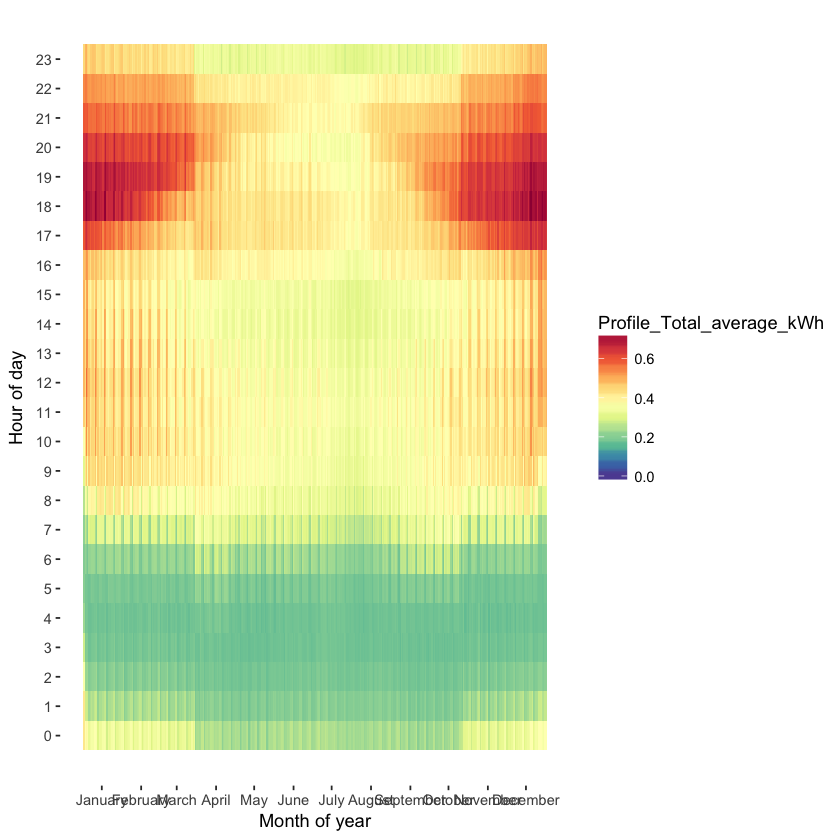

In [49]:
#####################################################################################
#
# Liander_E_visualise_heat_map
#
# - 
#
#####################################################################################

options(scipen=999)  # turn off scientific notation like 1e+06

# create heat map reference: https://benjaminlmoore.wordpress.com/tag/ggplot2/
hm.palette <- colorRampPalette(rev(brewer.pal(11, 'Spectral')), space='Lab')
ggplot(Liander_E, aes(y=Time, x=Date)) + 
  geom_tile(aes(fill=Profile_Total_average_kWh)) +
  scale_fill_gradientn(colours = hm.palette(100),
                       limits = c(0, max(Liander_E$Profile_Total_average_kWh, na.rm=T))) + 
#                       limits = c(0, max(Liander_G$Profile_Total_average_kWh, na.rm=T))) + 
  scale_y_continuous(name = "Hour of day", 
                     breaks = seq(0, 23, by=1)) + 
  scale_x_date(name = "Month of year", 
               breaks = seq(as.Date("2009-01-15"), 
                            as.Date("2009-12-15"), 
                            by = "1 month"), date_labels ="%B") +
  theme(panel.background = element_blank(),
        plot.background = element_blank())

#### Heat map natural gas consumption

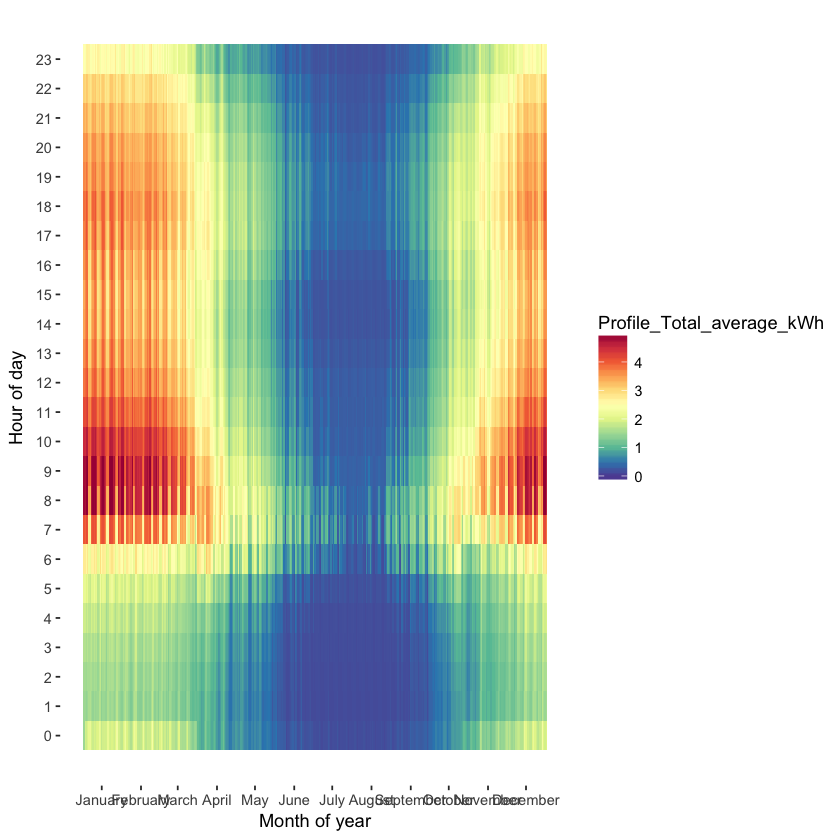

In [50]:
#####################################################################################
#
# Liander_E_visualise_heat_map
#
# - 
#
#####################################################################################

options(scipen=999)  # turn off scientific notation like 1e+06

# create heat map reference: https://benjaminlmoore.wordpress.com/tag/ggplot2/
hm.palette <- colorRampPalette(rev(brewer.pal(11, 'Spectral')), space='Lab')
ggplot(Liander_G, aes(y=Time, x=Date)) + 
  geom_tile(aes(fill=Profile_Total_average_kWh)) +
  scale_fill_gradientn(colours = hm.palette(100),
                       limits = c(0, max(Liander_G$Profile_Total_average_kWh, na.rm=T))) + 
  scale_y_continuous(name = "Hour of day", 
                     breaks = seq(0, 23, by=1)) + 
  scale_x_date(name = "Month of year", 
               breaks = seq(as.Date("2008-01-15"), 
                            as.Date("2008-12-15"), 
                            by = "1 month"), date_labels ="%B") +
  theme(panel.background = element_blank(),
        plot.background = element_blank())

